Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
import pickle


Load the Data

In [2]:
df = pd.read_csv('avocado.csv')

print(df.head())


   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

Data Preprocessing

In [3]:
print(df.isnull().sum())

df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day_of_week'] = df['Date'].dt.dayofweek

df.drop(columns=['Date', 'Unnamed: 0'], inplace=True)

df = pd.get_dummies(df, columns=['type', 'region'], drop_first=True)

X = df.drop(columns=['AveragePrice'])
y_reg = df['AveragePrice']

price_threshold = df['AveragePrice'].median()
df['price_category'] = np.where(df['AveragePrice'] > price_threshold, 1, 0)
y_clf = df['price_category']


Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


Train Test split

In [4]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)


Feature scaling

In [ ]:
scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)


In [ ]:
scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)


In [5]:
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
y_pred_reg_lr = lr.predict(X_test_reg)

print("Linear Regression - R2 Score:", r2_score(y_test_reg, y_pred_reg_lr))
print("Linear Regression - MSE:", mean_squared_error(y_test_reg, y_pred_reg_lr))

rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train_reg, y_train_reg)
y_pred_reg_rfr = rfr.predict(X_test_reg)

print("Random Forest Regression - R2 Score:", r2_score(y_test_reg, y_pred_reg_rfr))
print("Random Forest Regression - MSE:", mean_squared_error(y_test_reg, y_pred_reg_rfr))



Linear Regression - R2 Score: 0.5866037833502835
Linear Regression - MSE: 0.06641999117611344
Random Forest Regression - R2 Score: 0.9045326457048348
Random Forest Regression - MSE: 0.015338652301369864


In [6]:
log_reg = LogisticRegression()
log_reg.fit(X_train_clf, y_train_clf)
y_pred_clf_lr = log_reg.predict(X_test_clf)

print("Logistic Regression - Accuracy:", accuracy_score(y_test_clf, y_pred_clf_lr))
print("Logistic Regression - Classification Report:\n", classification_report(y_test_clf, y_pred_clf_lr))

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_clf, y_train_clf)
y_pred_clf_rfc = rfc.predict(X_test_clf)

print("Random Forest Classifier - Accuracy:", accuracy_score(y_test_clf, y_pred_clf_rfc))
print("Random Forest Classifier - Classification Report:\n", classification_report(y_test_clf, y_pred_clf_rfc))


Logistic Regression - Accuracy: 0.8136986301369863
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      1793
           1       0.83      0.80      0.81      1857

    accuracy                           0.81      3650
   macro avg       0.81      0.81      0.81      3650
weighted avg       0.81      0.81      0.81      3650

Random Forest Classifier - Accuracy: 0.9276712328767124
Random Forest Classifier - Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      1793
           1       0.92      0.94      0.93      1857

    accuracy                           0.93      3650
   macro avg       0.93      0.93      0.93      3650
weighted avg       0.93      0.93      0.93      3650



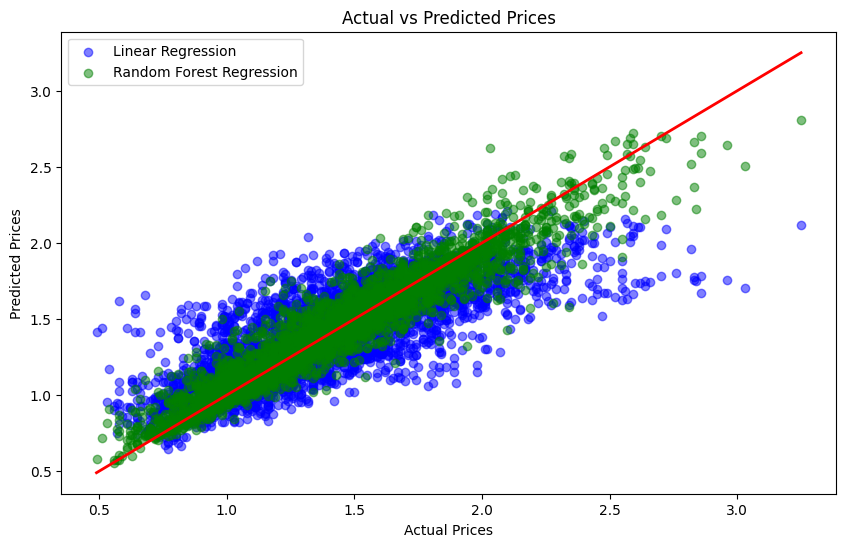

In [7]:
# Plotting the actual vs predicted prices for regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg_lr, color='blue', alpha=0.5, label='Linear Regression')
plt.scatter(y_test_reg, y_pred_reg_rfr, color='green', alpha=0.5, label='Random Forest Regression')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()


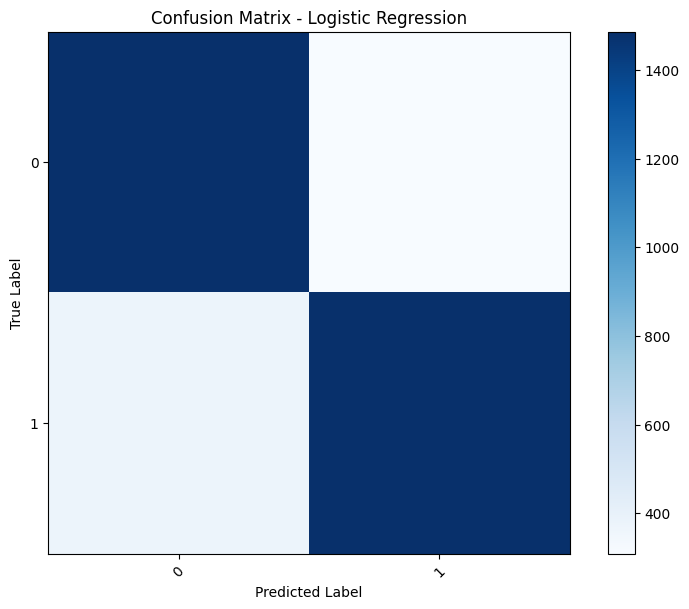

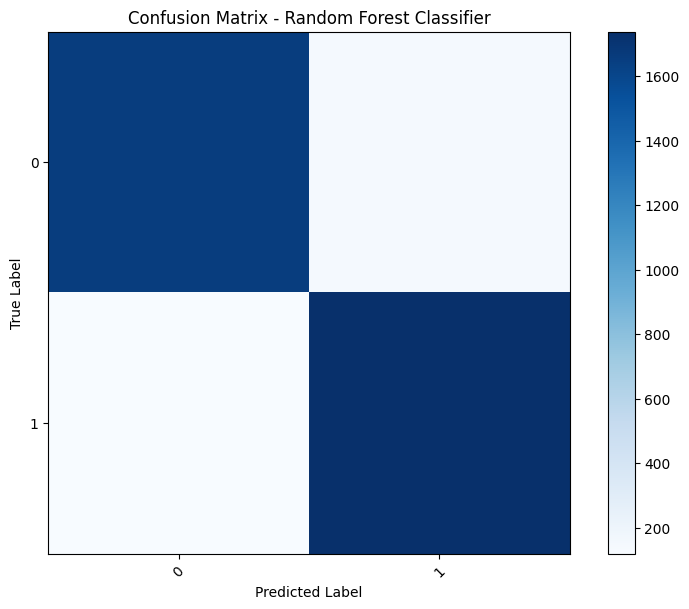

In [8]:
# Plotting the confusion matrix for classification
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_clf)))
    plt.xticks(tick_marks, np.unique(y_clf), rotation=45)
    plt.yticks(tick_marks, np.unique(y_clf))
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

cm_lr = confusion_matrix(y_test_clf, y_pred_clf_lr)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm_lr, title='Confusion Matrix - Logistic Regression')
plt.show()

cm_rfc = confusion_matrix(y_test_clf, y_pred_clf_rfc)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm_rfc, title='Confusion Matrix - Random Forest Classifier')
plt.show()



Saving the model

In [12]:
with open('final_classifier_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)




In [13]:
with open('final_classifier_model.pkl', 'rb') as file:
    loaded_rfc = pickle.load(file)

print(loaded_rfc)

RandomForestClassifier(random_state=42)
